In [28]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbn
sbn.set()
import ggplot
from altair import *
pd.set_option('display.max_columns', None)

In [31]:
grad_rates = pd.read_csv('gr2014.csv')
inst_info = pd.read_csv('hd2014.csv', encoding='ISO-8859-1')
fin_info = pd.read_csv('sfa1314.csv')

In [44]:
grad_rates.head(10)

,UNITID,GRTYPE,CHRTSTAT,SECTION,COHORT,LINE,XGRTOTLT,GRTOTLT,XGRTOTLM,GRTOTLM,XGRTOTLW,GRTOTLW,XGRAIANT,GRAIANT,XGRAIANM,GRAIANM,XGRAIANW,GRAIANW,XGRASIAT,GRASIAT,XGRASIAM,GRASIAM,XGRASIAW,GRASIAW,XGRBKAAT,GRBKAAT,XGRBKAAM,GRBKAAM,XGRBKAAW,GRBKAAW,XGRHISPT,GRHISPT,XGRHISPM,GRHISPM,XGRHISPW,GRHISPW,XGRNHPIT,GRNHPIT,XGRNHPIM,GRNHPIM,XGRNHPIW,GRNHPIW,XGRWHITT,GRWHITT,XGRWHITM,GRWHITM,XGRWHITW,GRWHITW,XGR2MORT,GR2MORT,XGR2MORM,GR2MORM,XGR2MORW,GR2MORW,XGRUNKNT,GRUNKNT,XGRUNKNM,GRUNKNM,XGRUNKNW,GRUNKNW,XGRNRALT,GRNRALT,XGRNRALM,GRNRALM,XGRNRALW,GRNRALW
0,100654,2,12,1,1,999,R,1044,R,476.0,R,568.0,R,1.0,R,1.0,R,0.0,R,0.0,R,0.0,R,0.0,R,1022.0,R,463.0,R,559.0,R,2.0,R,2.0,R,0.0,R,0.0,R,0.0,R,0.0,R,7.0,R,4.0,R,3.0,R,0.0,R,0.0,R,0.0,R,0.0,R,0.0,R,0.0,R,12.0,R,6.0,R,6.0
1,100654,3,13,1,1,999,R,368,R,128.0,R,240.0,Z,0.0,Z,0.0,Z,0.0,R,0.0,Z,0.0,R,0.0,R,366.0,R,128.0,R,238.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,R,1.0,Z,0.0,R,1.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,R,1.0,Z,0.0,R,1.0
2,100654,6,10,2,2,10,R,1044,R,476.0,R,568.0,R,1.0,R,1.0,R,0.0,R,0.0,R,0.0,R,0.0,R,1022.0,R,463.0,R,559.0,R,2.0,R,2.0,R,0.0,R,0.0,R,0.0,R,0.0,R,7.0,R,4.0,R,3.0,R,0.0,R,0.0,R,0.0,R,0.0,R,0.0,R,0.0,R,12.0,R,6.0,R,6.0
3,100654,8,12,2,2,50,R,1044,R,476.0,R,568.0,R,1.0,R,1.0,R,0.0,R,0.0,R,0.0,R,0.0,R,1022.0,R,463.0,R,559.0,R,2.0,R,2.0,R,0.0,R,0.0,R,0.0,R,0.0,R,7.0,R,4.0,R,3.0,R,0.0,R,0.0,R,0.0,R,0.0,R,0.0,R,0.0,R,12.0,R,6.0,R,6.0
4,100654,9,13,2,2,29A,R,368,R,128.0,R,240.0,Z,0.0,Z,0.0,Z,0.0,R,0.0,Z,0.0,R,0.0,R,366.0,R,128.0,R,238.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,R,1.0,Z,0.0,R,1.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,R,1.0,Z,0.0,R,1.0
5,100654,12,16,2,2,18A,R,368,R,128.0,R,240.0,Z,0.0,Z,0.0,Z,0.0,R,0.0,Z,0.0,R,0.0,R,366.0,R,128.0,R,238.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,R,1.0,Z,0.0,R,1.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,R,1.0,Z,0.0,R,1.0
6,100654,13,17,2,2,19,R,115,R,23.0,R,92.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,R,113.0,R,23.0,R,90.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,R,1.0,Z,0.0,R,1.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,R,1.0,Z,0.0,R,1.0
7,100654,14,18,2,2,20,R,167,R,64.0,R,103.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,R,167.0,R,64.0,R,103.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0
8,100654,15,19,2,2,21,R,86,R,41.0,R,45.0,Z,0.0,Z,0.0,Z,0.0,R,0.0,Z,0.0,R,0.0,R,86.0,R,41.0,R,45.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,R,0.0,Z,0.0,R,0.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,R,0.0,Z,0.0,R,0.0
9,100654,42,32,1,1,999,R,676,R,348.0,R,328.0,R,1.0,R,1.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,R,656.0,R,335.0,R,321.0,R,2.0,R,2.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,R,6.0,R,4.0,R,2.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,Z,0.0,R,11.0,R,6.0,R,5.0


In [36]:
inst_info.head(0)

,UNITID,INSTNM,ADDR,CITY,STABBR,ZIP,FIPS,OBEREG,CHFNM,CHFTITLE,GENTELE,EIN,OPEID,OPEFLAG,WEBADDR,ADMINURL,FAIDURL,APPLURL,NPRICURL,VETURL,ATHURL,SECTOR,ICLEVEL,CONTROL,HLOFFER,UGOFFER,GROFFER,HDEGOFR1,DEGGRANT,HBCU,HOSPITAL,MEDICAL,TRIBAL,LOCALE,OPENPUBL,ACT,NEWID,DEATHYR,CLOSEDAT,CYACTIVE,POSTSEC,PSEFLAG,PSET4FLG,RPTMTH,IALIAS,INSTCAT,CCBASIC,CCIPUG,CCIPGRAD,CCUGPROF,CCENRPRF,CCSIZSET,CARNEGIE,LANDGRNT,INSTSIZE,CBSA,CBSATYPE,CSA,NECTA,F1SYSTYP,F1SYSNAM,F1SYSCOD,COUNTYCD,COUNTYNM,CNGDSTCD,LONGITUD,LATITUDE,DFRCGID,DFRCUSCG


In [37]:
fin_info.head(0)

,UNITID,XSCUGRAD,SCUGRAD,XSCUGFFN,SCUGFFN,XSCUGFFP,SCUGFFP,XSCFA2,SCFA2,XSCFA1N,SCFA1N,XSCFA1P,SCFA1P,XSCFA11N,SCFA11N,XSCFA11P,SCFA11P,XSCFA12N,SCFA12N,XSCFA12P,SCFA12P,XSCFA13N,SCFA13N,XSCFA13P,SCFA13P,XSCFA14N,SCFA14N,XSCFA14P,SCFA14P,XSCFY2,SCFY2,XSCFY1N,SCFY1N,XSCFY1P,SCFY1P,XSCFY11N,SCFY11N,XSCFY11P,SCFY11P,XSCFY12N,SCFY12N,XSCFY12P,SCFY12P,XSCFY13N,SCFY13N,XSCFY13P,SCFY13P,XSCFY14N,SCFY14N,XSCFY14P,SCFY14P,XUAGRNTN,UAGRNTN,XUAGRNTP,UAGRNTP,XUAGRNTT,UAGRNTT,XUAGRNTA,UAGRNTA,XUPGRNTN,UPGRNTN,XUPGRNTP,UPGRNTP,XUPGRNTT,UPGRNTT,XUPGRNTA,UPGRNTA,XUFLOANN,UFLOANN,XUFLOANP,UFLOANP,XUFLOANT,UFLOANT,XUFLOANA,UFLOANA,XANYAIDN,ANYAIDN,XANYAIDP,ANYAIDP,XAIDFSIN,AIDFSIN,XAIDFSIP,AIDFSIP,XAGRNT_N,AGRNT_N,XAGRNT_P,AGRNT_P,XAGRNT_T,AGRNT_T,XAGRNT_A,AGRNT_A,XFGRNT_N,FGRNT_N,XFGRNT_P,FGRNT_P,XFGRNT_T,FGRNT_T,XFGRNT_A,FGRNT_A,XPGRNT_N,PGRNT_N,XPGRNT_P,PGRNT_P,XPGRNT_T,PGRNT_T,XPGRNT_A,PGRNT_A,XOFGRT_N,OFGRT_N,XOFGRT_P,OFGRT_P,XOFGRT_T,OFGRT_T,XOFGRT_A,OFGRT_A,XSGRNT_N,SGRNT_N,XSGRNT_P,SGRNT_P,XSGRNT_T,SGRNT_T,XSGRNT_A,SGRNT_A,XIGRNT_N,IGRNT_N,XIGRNT_P,IGRNT_P,XIGRNT_T,IGRNT_T,XIGRNT_A,IGRNT_A,XLOAN_N,LOAN_N,XLOAN_P,LOAN_P,XLOAN_T,LOAN_T,XLOAN_A,LOAN_A,XFLOAN_N,FLOAN_N,XFLOAN_P,FLOAN_P,XFLOAN_T,FLOAN_T,XFLOAN_A,FLOAN_A,XOLOAN_N,OLOAN_N,XOLOAN_P,OLOAN_P,XOLOAN_T,OLOAN_T,XOLOAN_A,OLOAN_A,XGISTN2,GISTN2,XGISTON2,GISTON2,XGISTWF2,GISTWF2,XGISTOF2,GISTOF2,XGISTUN2,GISTUN2,XGISTT2,GISTT2,XGISTA2,GISTA2,XGISTN1,GISTN1,XGISTON1,GISTON1,XGISTWF1,GISTWF1,XGISTOF1,GISTOF1,XGISTUN1,GISTUN1,XGISTT1,GISTT1,XGISTA1,GISTA1,XGISTN0,GISTN0,XGISTON0,GISTON0,XGISTWF0,GISTWF0,XGISTOF0,GISTOF0,XGISTUN0,GISTUN0,XGISTT0,GISTT0,XGISTA0,GISTA0,XGIS4N2,GIS4N2,XGIS4ON2,GIS4ON2,XGIS4OF2,GIS4OF2,XGIS4WF2,GIS4WF2,XGIS4UN2,GIS4UN2,XGIS4G2,GIS4G2,XGIS4T2,GIS4T2,XGIS4A2,GIS4A2,XGIS4N12,GIS4N12,XGIS4G12,GIS4G12,XGIS4T12,GIS4T12,XGIS4A12,GIS4A12,XGIS4N22,GIS4N22,XGIS4G22,GIS4G22,XGIS4T22,GIS4T22,XGIS4A22,GIS4A22,XGIS4N32,GIS4N32,XGIS4G32,GIS4G32,XGIS4T32,GIS4T32,XGIS4A32,GIS4A32,XGIS4N42,GIS4N42,XGIS4G42,GIS4G42,XGIS4T42,GIS4T42,XGIS4A42,GIS4A42,XGIS4N52,GIS4N52,XGIS4G52,GIS4G52,XGIS4T52,GIS4T52,XGIS4A52,GIS4A52,XGIS4N1,GIS4N1,XGIS4ON1,GIS4ON1,XGIS4OF1,GIS4OF1,XGIS4WF1,GIS4WF1,XGIS4UN1,GIS4UN1,XGIS4G1,GIS4G1,XGIS4T1,GIS4T1,XGIS4A1,GIS4A1,XGIS4N11,GIS4N11,XGIS4G11,GIS4G11,XGIS4T11,GIS4T11,XGIS4A11,GIS4A11,XGIS4N21,GIS4N21,XGIS4G21,GIS4G21,XGIS4T21,GIS4T21,XGIS4A21,GIS4A21,XGIS4N31,GIS4N31,XGIS4G31,GIS4G31,XGIS4T31,GIS4T31,XGIS4A31,GIS4A31,XGIS4N41,GIS4N41,XGIS4G41,GIS4G41,XGIS4T41,GIS4T41,XGIS4A41,GIS4A41,XGIS4N51,GIS4N51,XGIS4G51,GIS4G51,XGIS4T51,GIS4T51,XGIS4A51,GIS4A51,XGIS4N0,GIS4N0,XGIS4ON0,GIS4ON0,XGIS4OF0,GIS4OF0,XGIS4WF0,GIS4WF0,XGIS4UN0,GIS4UN0,XGIS4G0,GIS4G0,XGIS4T0,GIS4T0,XGIS4A0,GIS4A0,XGIS4N10,GIS4N10,XGIS4G10,GIS4G10,XGIS4T10,GIS4T10,XGIS4A10,GIS4A10,XGIS4N20,GIS4N20,XGIS4G20,GIS4G20,XGIS4T20,GIS4T20,XGIS4A20,GIS4A20,XGIS4N30,GIS4N30,XGIS4G30,GIS4G30,XGIS4T30,GIS4T30,XGIS4A30,GIS4A30,XGIS4N40,GIS4N40,XGIS4G40,GIS4G40,XGIS4T40,GIS4T40,XGIS4A40,GIS4A40,XGIS4N50,GIS4N50,XGIS4G50,GIS4G50,XGIS4T50,GIS4T50,XGIS4A50,GIS4A50,XNPIST2,NPIST2,XNPIST1,NPIST1,XNPIST0,NPIST0,XNPIS412,NPIS412,XNPIS422,NPIS422,XNPIS432,NPIS432,XNPIS442,NPIS442,XNPIS452,NPIS452,XNPIS411,NPIS411,XNPIS421,NPIS421,XNPIS431,NPIS431,XNPIS441,NPIS441,XNPIS451,NPIS451,XNPIS410,NPIS410,XNPIS420,NPIS420,XNPIS430,NPIS430,XNPIS440,NPIS440,XNPIS450,NPIS450,XGRNTN2,GRNTN2,XGRNTON2,GRNTON2,XGRNTWF2,GRNTWF2,XGRNTOF2,GRNTOF2,XGRNTUN2,GRNTUN2,XGRNTT2,GRNTT2,XGRNTA2,GRNTA2,XGRNTN1,GRNTN1,XGRNTON1,GRNTON1,XGRNTWF1,GRNTWF1,XGRNTOF1,GRNTOF1,XGRNTUN1,GRNTUN1,XGRNTT1,GRNTT1,XGRNTA1,GRNTA1,XGRNTN0,GRNTN0,XGRNTON0,GRNTON0,XGRNTWF0,GRNTWF0,XGRNTOF0,GRNTOF0,XGRNTUN0,GRNTUN0,XGRNTT0,GRNTT0,XGRNTA0,GRNTA0,XGRN4N2,GRN4N2,XGRN4ON2,GRN4ON2,XGRN4OF2,GRN4OF2,XGRN4WF2,GRN4WF2,XGRN4UN2,GRN4UN2,XGRN4G2,GRN4G2,XGRN4T2,GRN4T2,XGRN4A2,GRN4A2,XGRN4N12,GRN4N12,XGRN4G12,GRN4G12,XGRN4T12,GRN4T12,XGRN4A12,GRN4A12,XGRN4N22,GRN4N22,XGRN4G22,GRN4G22,XGRN4T22,GRN4T22,XGRN4A22,GRN4A22,XGRN4N32,GRN4N32,XGRN4G32,GRN4G32,XGRN4T32,GRN4T32,XGRN4A32,G

In [40]:
area_inst = inst_info.query("STABBR == 'IA' | STABBR == 'WI' | STABBR == 'MN'")
area_inst = area_inst[['UNITID', 'INSTNM']]

In [78]:
pell_info = fin_info[['SCUGFFN', 'PGRNT_N', 'UNITID', 'NPIS422', 'NPIS432']]

In [60]:
grad_info = grad_rates[['UNITID', 'GRTYPE', 'GRTOTLT']]

In [61]:
grad_info = pd.pivot_table(grad_info, values='GRTOTLT', index='UNITID', columns='GRTYPE')
grad_info = grad_info[[2, 3]]
grad_info.rename(columns={2:'cohort', 3:'graduates'}, inplace=True)

In [64]:
def calc_grad_rate(cohort, graduates):
    return graduates / cohort

def grad_wrapper(row):
    return calc_grad_rate(row.cohort, row.graduates)

def calc_pell_share(cohort, pell_students):
    return pell_students / cohort

def pell_wrapper(row):
    return calc_pell_share(row.SCUGFFN, row.PGRNT_N)

def calc_net_price(bracket_one, bracket_two):
    """Calculates the net price of the institution based on the $30,000-48,000 and
       $48,000-70,000 income brakets.
    """
    return (bracket_one + bracket_two) / 2

def net_wrapper(row):
    return calc_net_price(row.NPIS422, row.NPIS432)

In [67]:
grad_info['grad_rate'] = grad_info.apply(grad_wrapper, axis=1)

GRTYPE,cohort,graduates,grad_rate
UNITID,,,
100654,1044.0,368.0,0.352490
100663,1246.0,692.0,0.555377
100690,9.0,2.0,0.222222
100706,765.0,353.0,0.461438
100724,1330.0,350.0,0.263158


In [69]:
grad_info = grad_info.reset_index()

In [79]:
pell_info['pell_share'] = pell_info.apply(pell_wrapper, axis=1)
pell_info['net_cost'] = pell_info.apply(net_wrapper, axis=1)

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [81]:
pell_info = pell_info.fillna(value=0)
pell_info = pell_info.query("net_cost != 0")

,SCUGFFN,PGRNT_N,UNITID,NPIS422,NPIS432,pell_share,net_cost
0,1066,857.0,100654,14882.0,17479.0,0.803940,16180.5
1,1732,583.0,100663,13703.0,16137.0,0.336605,14920.0
3,638,160.0,100706,16849.0,19820.0,0.250784,18334.5
4,1520,1080.0,100724,11253.0,12817.0,0.710526,12035.0
5,6428,1147.0,100751,18895.0,20583.0,0.178438,19739.0


In [85]:
mean_cost = pell_info.net_cost.mean()

def norm_cost(net_cost, average=mean_cost):
    return net_cost / average

def norm_wrapper(row):
    return norm_cost(row.net_cost)

In [86]:
pell_info['norm_cost'] = pell_info.apply(norm_wrapper, axis=1)
pell_info.head()

,SCUGFFN,PGRNT_N,UNITID,NPIS422,NPIS432,pell_share,net_cost,norm_cost
0,1066,857.0,100654,14882.0,17479.0,0.803940,16180.5,1.625107
1,1732,583.0,100663,13703.0,16137.0,0.336605,14920.0,1.498507
3,638,160.0,100706,16849.0,19820.0,0.250784,18334.5,1.841446
4,1520,1080.0,100724,11253.0,12817.0,0.710526,12035.0,1.208749
5,6428,1147.0,100751,18895.0,20583.0,0.178438,19739.0,1.982509


In [87]:
pell_info = pell_info[['UNITID', 'pell_share', 'norm_cost']]

In [96]:
grad_info = grad_info[['UNITID', 'grad_rate']]
grad_info = grad_info.fillna(value=0).query("grad_rate != 0")

In [97]:
index_table = area_inst.merge(pell_info, on='UNITID')

In [98]:
index_table = index_table.merge(grad_info, on='UNITID')

In [100]:
def calc_access(pell_share, norm_cost, grad_rate):
    return pell_share * norm_cost * grad_rate

def access_wrapper(row):
    return calc_access(row.pell_share, row.norm_cost, row.grad_rate)

In [101]:
index_table['access_index'] = index_table.apply(access_wrapper, axis=1)

In [108]:
index_table.sort_values('norm_cost', ascending=False)

,UNITID,INSTNM,pell_share,norm_cost,grad_rate,access_index
24,240453,University of Wisconsin-Milwaukee,0.382693,1.592566,0.435032,0.265136
13,175272,Winona State University,0.248466,1.470084,0.571582,0.208780
5,174020,Metropolitan State University,0.640625,1.440957,0.338983,0.312920
23,240444,University of Wisconsin-Madison,0.143445,1.368995,0.836777,0.164322
2,154095,University of Northern Iowa,0.236234,1.355637,0.639452,0.204783
21,240417,University of Wisconsin-Stout,0.273543,1.310139,0.531537,0.190492
10,174358,Minnesota State University Moorhead,0.306144,1.301452,0.419297,0.167061
18,240329,University of Wisconsin-La Crosse,0.213534,1.300397,0.683530,0.189802
12,175078,Southwest Minnesota State University,0.406742,1.291860,0.432000,0.226996
19,240365,University of Wisconsin-Oshkosh,0.278613,1.289249,0.543442,0.195205


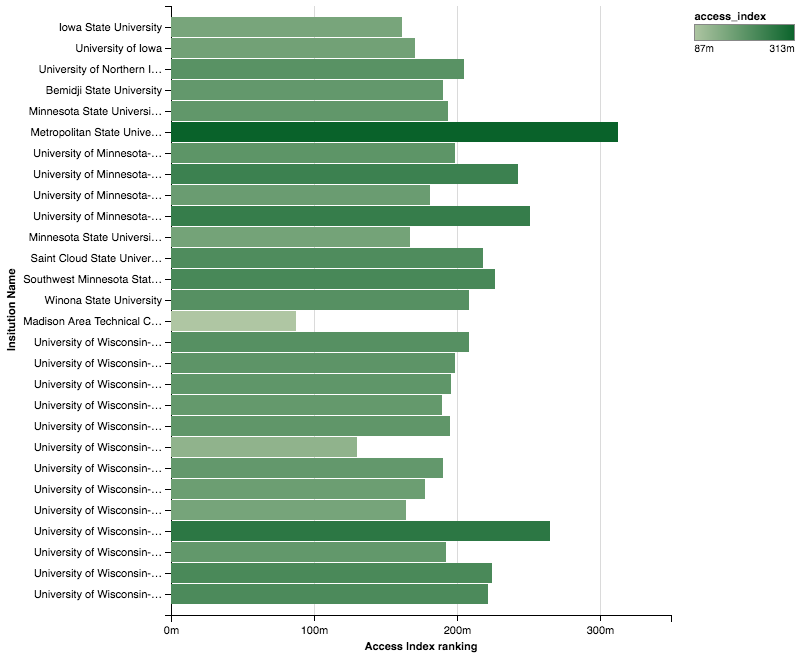

In [105]:
Chart(index_table).mark_bar().encode(
    x=X('access_index', title='Access Index ranking'),
    y=Y('INSTNM', sort=SortField(field='access_index', order='descending'), title='Insitution Name'),
    color=Color('access_index')
    )